In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
rentals = pd.read_csv('model_data_All.csv')
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2416 non-null   int64  
 1   BedRooms       2416 non-null   float64
 2   SQFT           2416 non-null   float64
 3   BathRooms      2416 non-null   float64
 4   No_Smoke       2416 non-null   float64
 5   No_Parking     2416 non-null   float64
 6   W_D_Lndry      2416 non-null   float64
 7   Pets           2416 non-null   float64
 8   Property_Type  2416 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 170.0 KB


In [3]:
# slice data into features and target
X_orgi = rentals.drop(columns = ['Price'])
X_org = sm.add_constant(X_orgi)

y_org = rentals.loc[:, 'Price']

# fit model with target as housing price index 
log_model = sm.OLS(y_org, X_org, data=rentals) 

# fit our model 
results = log_model.fit()
results.summary()

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     451.4
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:25:20   Log-Likelihood:                -17239.
No. Observations:                2416   AIC:                         3.450e+04
Df Residuals:                    2407   BIC:                         3.455e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           870.0635     29.761     29.235      0.000     811.704     928.423
BedRooms        105.0592     15.406      6.819      0.000      74.849     135.269
SQFT              0.6717      0.034     19.578      0.000       0.604       0.739
BathRooms       120.3087     18.591      6.471      0.000      83.852     156.765
No_Smoke         16.1351     13.711      1.177      0.239     -10.752      43.022
No_Parking     -225.4912    136.518     -1.652      0.099    -493.197      42.214
W_D_Lndry       311.8532     15.278     20.412      0.000     281.894     341.812
Pets             94.4284     14.321      6.594      0.000      66.345     122.512
Property_Type   -64.3166     23.141     -2.779      0.005    -109.696     -18.938
==============================================================================
Omnibus:                      406.377   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5621.461
Skew:                          -0.344   Prob(JB):                         0.00
Kurtosis:                      10.441   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

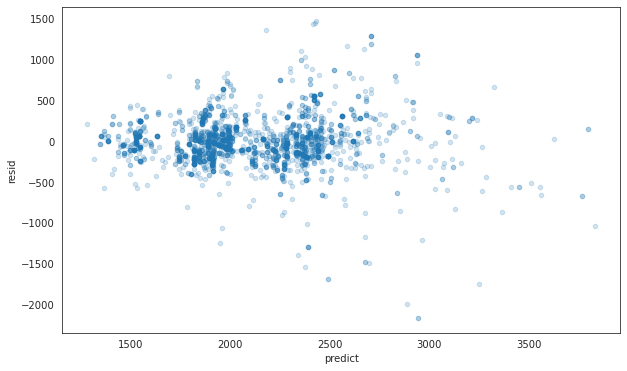

In [4]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis
rentals['predict'] = results.predict(X_org)
rentals['resid'] = rentals.Price - rentals.predict
with sns.axes_style('white'):
    plot=rentals.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

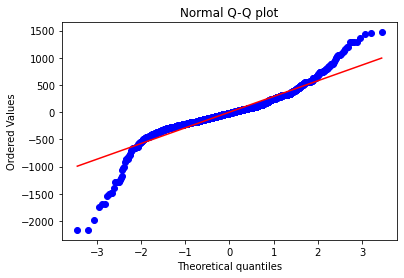

In [5]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(rentals['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [6]:
influence = results.get_influence()
influence_frame = influence.summary_frame().reset_index()

In [7]:
influence_frame.cooks_d.sort_values(ascending=False).head()

342     0.224265
343     0.224265
1992    0.060962
503     0.058616
1644    0.047517
Name: cooks_d, dtype: float64

In [8]:
vif = pd.DataFrame()
vif['variables'] = X_org.columns
vif['vif'] =[variance_inflation_factor(X_org.values, i) for i in range(X_org.shape[1])]
vif

,variables,vif
0,const,23.101222
1,BedRooms,3.519017
2,SQFT,3.522872
3,BathRooms,2.697252
4,No_Smoke,1.081855
5,No_Parking,1.003936
6,W_D_Lndry,1.106725
7,Pets,1.129728
8,Property_Type,1.388181


In [9]:
rentals.corr()['Price'].sort_values(ascending=False)

Price            1.000000
predict          0.774613
SQFT             0.684765
resid            0.632436
BathRooms        0.626175
BedRooms         0.615923
W_D_Lndry        0.333912
Property_Type    0.239441
No_Smoke         0.130060
Pets             0.030773
No_Parking      -0.053826
Name: Price, dtype: float64

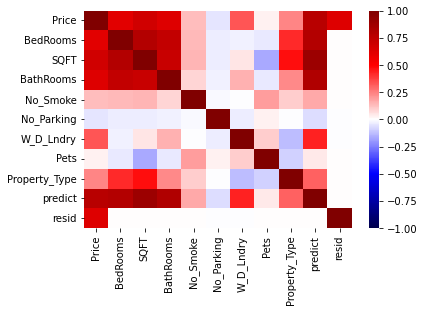

In [12]:
sns.heatmap(rentals.corr(), cmap="seismic",  vmin=-1, vmax=1);

# Work To Be Done

### Model Linearity - Filter Features and look at transformations

### Outliers - Influence Range okay

### Collinearity - Condition Number is reasonable but need to investigate

### Correlated Errors - Look into this

### Normality - Performing Transformation to normalize the spread